In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Carregar conexões
load_dotenv('../.env')

# Conectar no banco
user = os.getenv('DB_USER')
password = os.getenv('DB_PASS')
host = os.getenv('DB_HOST')
port = os.getenv('DB_PORT')
dbname = os.getenv('DB_NAME')

url = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"
engine = create_engine(url)

print("Conexão pronta para gráficos!")

Conexão pronta para gráficos!


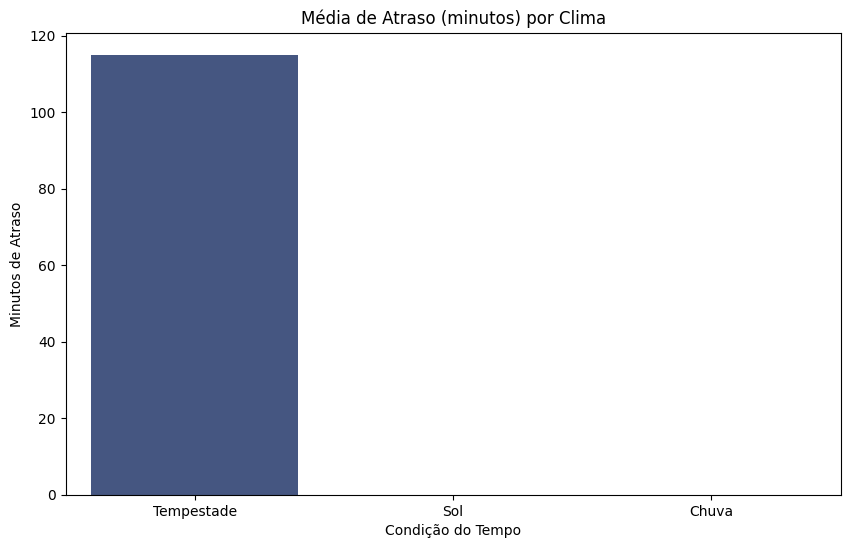

In [5]:
# Célula 2: Gráfico de Clima vs Atraso (Corrigido)

# 1. Puxar os dados
df_clima = pd.read_sql("SELECT * FROM view_clima_atraso", engine)

# 2. Configurar tamanho
plt.figure(figsize=(10,6))

# 3. Criar gráfico (Agora com hue definido para evitar o aviso)
sns.barplot(
    data=df_clima, 
    x='condicao_climatica', 
    y='media_atraso', 
    hue='condicao_climatica',  # <-- AQUI: A cor segue o clima
    palette='viridis', 
    legend=False               # <-- AQUI: Esconde a legenda duplicada
)

# 4. Títulos
plt.title('Média de Atraso (minutos) por Clima')
plt.ylabel('Minutos de Atraso')
plt.xlabel('Condição do Tempo')

# 5. Mostrar
plt.show()

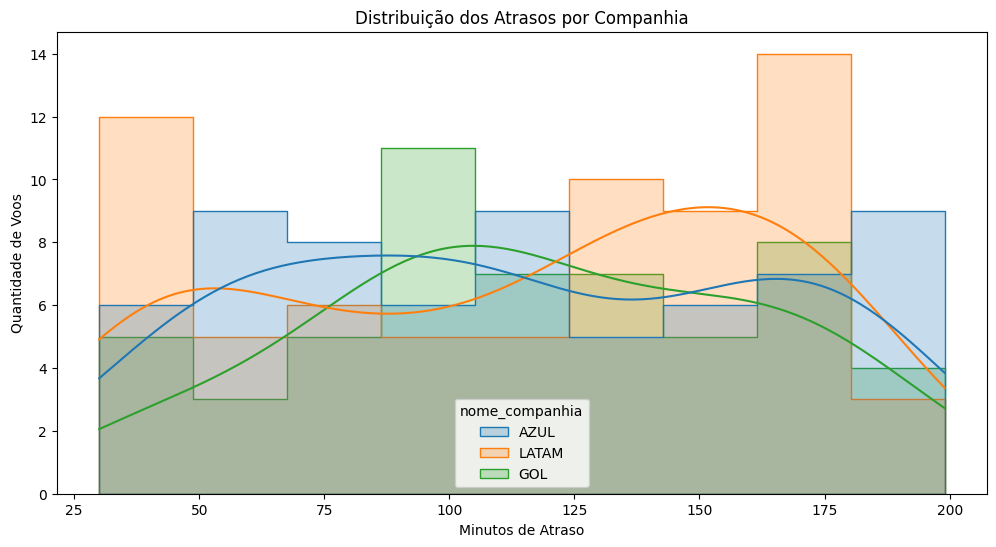

In [6]:
# Célula 3: Histograma de Atrasos (Quem tem voos mais longos?)

# 1. Pegar dados detalhados (filtrando atrasos muito loucos acima de 200min)
query = """
SELECT atraso_minutos, nome_companhia 
FROM fato_operacoes f
JOIN dim_companhia c ON f.id_companhia = c.id_companhia
WHERE atraso_minutos > 0 AND atraso_minutos < 200
"""
df_atrasos = pd.read_sql(query, engine)

# 2. Configurar tamanho
plt.figure(figsize=(12,6))

# 3. Criar Histograma (Curva de distribuição)
sns.histplot(data=df_atrasos, x='atraso_minutos', hue='nome_companhia', kde=True, element="step")

# 4. Títulos
plt.title('Distribuição dos Atrasos por Companhia')
plt.xlabel('Minutos de Atraso')
plt.ylabel('Quantidade de Voos')

# 5. Mostrar
plt.show()